In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")
Prussian = '#094F9E'
MaximumRed = '#D71723'

In [5]:
df = pd.read_csv("2025032816314225_100_VehicleData.csv")
df['InDay'] = df['In Time'] // 57600 + 1
df['TimeOfDay'] = df['In Time'] % 57600
theoretical_df = pd.read_csv('../resources/DemandTimeDistribution_Smoothed.csv')
theoretical_df['Smoothed_Pro'] *= 27500
n = 100
print(theoretical_df['Smoothed_Pro'].sum())

27499.999999999996


In [ ]:
df.head()

In [7]:
didiTravelPro = df[df['ClosedVehicle']==True].__len__() / df.__len__()
print(didiTravelPro)
print(df[df['ClosedVehicle']==True].__len__())
print(df[df['ClosedVehicle']==False].__len__())
print(df[df['InDay']==1].__len__())
print(df.__len__())
print(df['InDay'].max())

0.34682366974895784
160493
302258
42113
462751
11


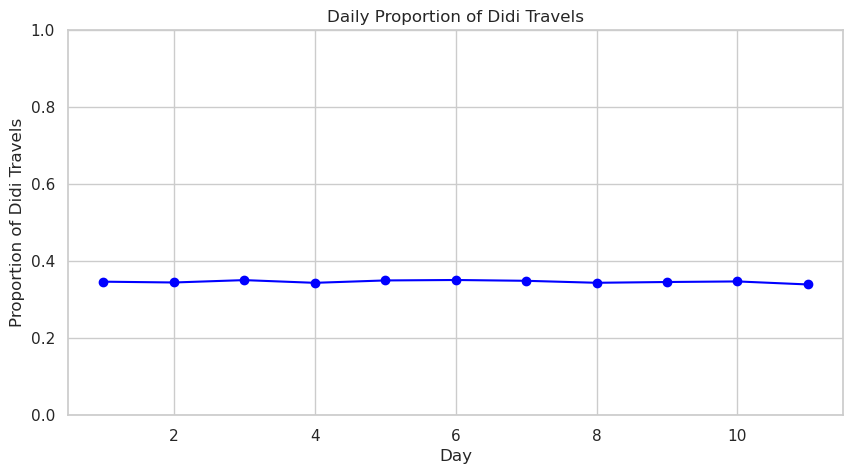

In [8]:
daily_total = df.groupby('InDay').size()
daily_didi = df[df['ClosedVehicle'] == True].groupby('InDay').size()
didiTravelPro = daily_didi / daily_total

plt.figure(figsize=(10, 5))
plt.plot(didiTravelPro.index, didiTravelPro, marker='o', linestyle='-', color='blue')
plt.xlabel('Day')
plt.ylabel('Proportion of Didi Travels')
plt.title('Daily Proportion of Didi Travels')
plt.ylim(0, 1)
plt.grid(True)
plt.show()

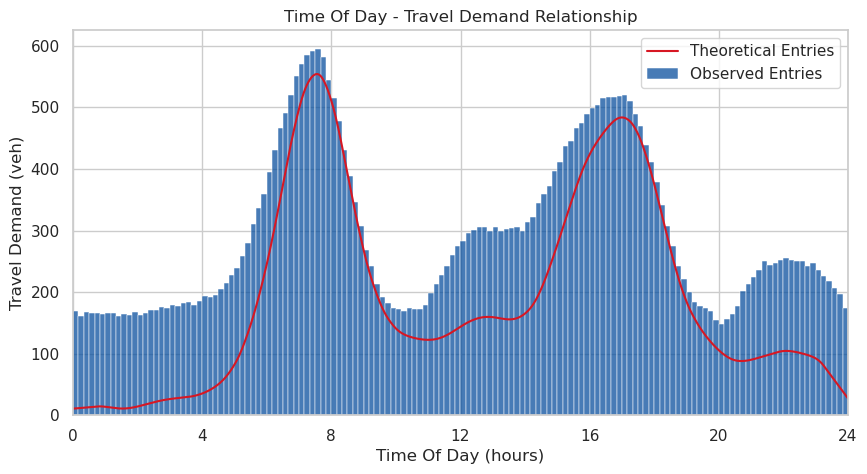

In [9]:
df_long = df[['TimeOfDay']].copy()
df_long['weights'] = np.ones(len(df)) / df['InDay'].nunique()

plt.figure(figsize=(10, 5))
sns.histplot(data=df_long, x='TimeOfDay', bins=144, weights='weights', kde=False, color=Prussian, label='Observed Entries')
plt.xlabel('Time Of Day (hours)')
plt.ylabel('Travel Demand (veh)')
plt.xlim(0, 57600)
plt.ylim(0)
plt.title('Time Of Day - Travel Demand Relationship'.format(n))
plt.plot(theoretical_df['T'], theoretical_df['Smoothed_Pro'] * 400, color=MaximumRed, label='Theoretical Entries')

xticks_positions = np.array([0, 4, 8, 12, 16, 20, 24]) * 2400
xticks_labels = [0, 4, 8, 12, 16, 20, 24]
plt.xticks(xticks_positions, xticks_labels)

plt.legend()
# plt.savefig('../pics/TimeOfDay_AverageVehicleEntriesNum_200.png')
plt.show()

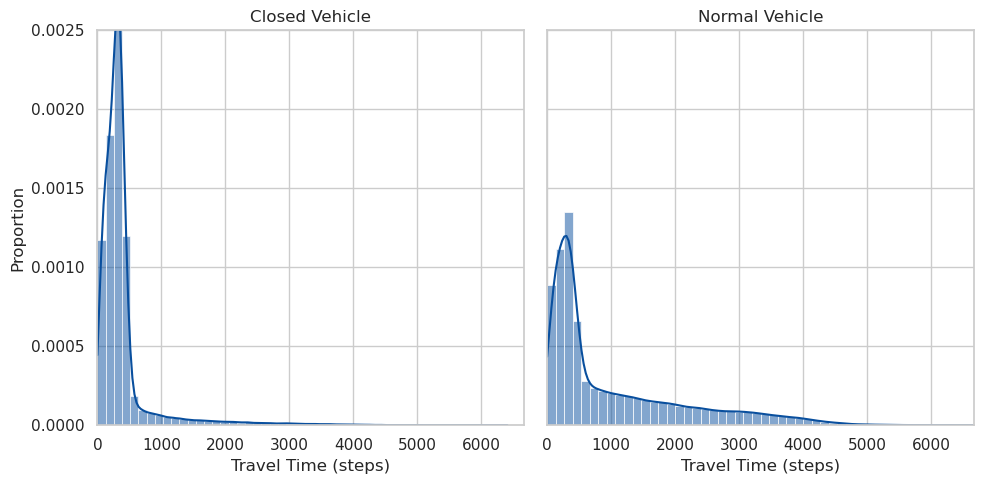

In [10]:
df['StayTime'] = df['Arrival Time'] - df['In Time']

fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharex=True, sharey=True)

# ClosedVehicle == True 分布
sns.histplot(df[df['ClosedVehicle'] == True]['StayTime'], bins=50, kde=True, color=Prussian, stat="density", ax=axes[0])
axes[0].set_xlabel('Travel Time (steps)')
axes[0].set_ylabel('Proportion')
axes[0].set_xlim(0, df['StayTime'].max())
axes[0].set_ylim(0, 0.0025)
axes[0].set_title('Closed Vehicle'.format(n))

# ClosedVehicle == False 分布
sns.histplot(df[df['ClosedVehicle'] == False]['StayTime'], bins=50, kde=True, color=Prussian, stat="density", ax=axes[1])
axes[1].set_xlabel('Travel Time (steps)')
axes[1].set_ylabel('Proportion')
axes[1].set_xlim(0, df['StayTime'].max())
axes[1].set_ylim(0, 0.0025)
axes[1].set_title('Normal Vehicle'.format(n))

plt.tight_layout()
plt.show()

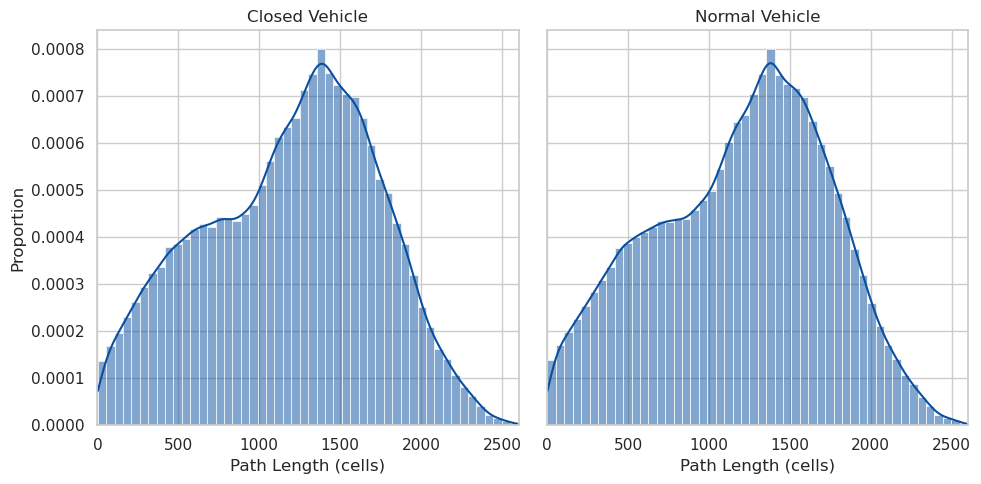

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharex=True, sharey=True)

# ClosedVehicle == True 的分布
sns.histplot(df[df['ClosedVehicle'] == True]['PathLength'], bins=50, kde=True, color=Prussian, stat="density", ax=axes[0])
axes[0].set_xlabel('Path Length (cells)')
axes[0].set_ylabel('Proportion')
axes[0].set_xlim(0, df['PathLength'].max())
axes[0].set_ylim(0)
axes[0].set_title('Closed Vehicle'.format(n))

# ClosedVehicle == False 的分布
sns.histplot(df[df['ClosedVehicle'] == False]['PathLength'], bins=50, kde=True, color=Prussian, stat="density", ax=axes[1])
axes[1].set_xlabel('Path Length (cells)')
axes[1].set_ylabel('Proportion')
axes[1].set_xlim(0, df['PathLength'].max())
axes[1].set_ylim(0)
axes[1].set_title('Normal Vehicle'.format(n))

plt.tight_layout()
# plt.savefig('../pics/DistributionOfVehiclePathLength_200.png')
plt.show()

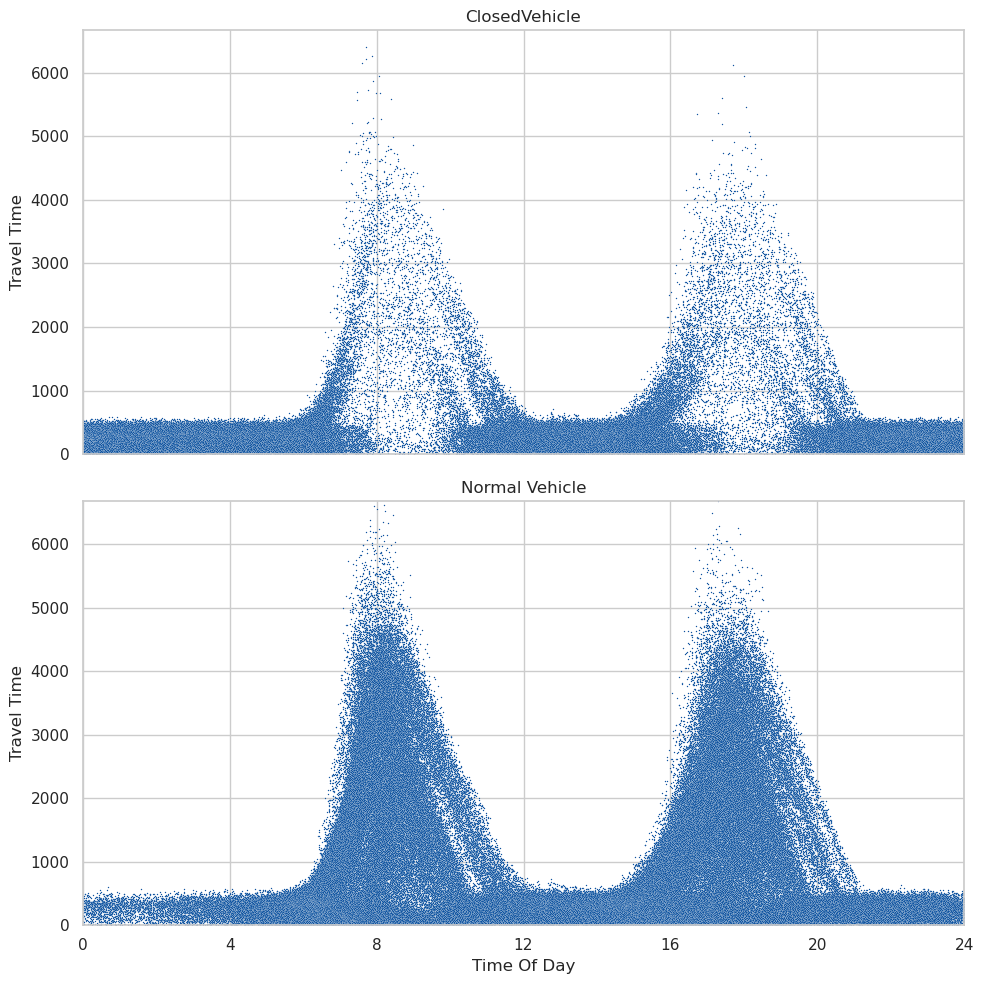

In [12]:
fig, axes = plt.subplots(2, 1, figsize=(10, 10), sharex=True, sharey=True)

# ClosedVehicle == True 的分布
sns.scatterplot(x=df[df['ClosedVehicle'] == True]['TimeOfDay'], y=df[df['ClosedVehicle'] == True]['StayTime'], s=1, color=Prussian, ax=axes[0])
axes[0].set_xlabel('Time Of Day')
axes[0].set_ylabel('Travel Time')
axes[0].set_title('ClosedVehicle'.format(n))
axes[0].set_xlim(0, 57600)
axes[0].set_ylim(0, df['StayTime'].max())

# ClosedVehicle == False 的分布
sns.scatterplot(x=df[df['ClosedVehicle'] == False]['TimeOfDay'], y=df[df['ClosedVehicle'] == False]['StayTime'], s=1, color=Prussian, ax=axes[1])
axes[1].set_xlabel('Time Of Day')
axes[1].set_ylabel('Travel Time')
axes[1].set_title('Normal Vehicle'.format(n))
axes[1].set_xlim(0, 57600)
axes[1].set_ylim(0, df['StayTime'].max())

xticks_positions = np.array([0, 4, 8, 12, 16, 20, 24]) * 2400
xticks_labels = [0, 4, 8, 12, 16, 20, 24]
plt.xticks(xticks_positions, xticks_labels)
plt.tight_layout()
# plt.savefig('../pics/StayTime_EntranceTimeOfDay_200.png')
plt.show()

In [13]:
closed_vehicles = df[df['ClosedVehicle'] == True]
normal_vehicles = df[df['ClosedVehicle'] == False]
interval = 400
time_points = np.arange(0, 57600, interval)
closed_vehicle_counts = np.zeros(len(time_points))
normal_vehicle_counts = np.zeros(len(time_points))
total_vehicle_counts = np.zeros(len(time_points))

def count_vehicles_at_time(vehicles, time_point):
    count = ((vehicles['In Time'] <= time_point) & (vehicles['Arrival Time'] >= time_point)).sum()
    return count


for i, time_point in enumerate(time_points):
    closed_count = 0
    normal_count = 0
    total_count = 0
    for day in range(df['InDay'].nunique()):
        t = day * 57600 + time_point
        closed_vehicle_counts[i] += count_vehicles_at_time(closed_vehicles, t)
        normal_vehicle_counts[i] += count_vehicles_at_time(normal_vehicles, t)
        total_vehicle_counts[i] += count_vehicles_at_time(df, t)
closed_vehicle_counts /= df['InDay'].nunique()
normal_vehicle_counts /= df['InDay'].nunique()
total_vehicle_counts /= df['InDay'].nunique()

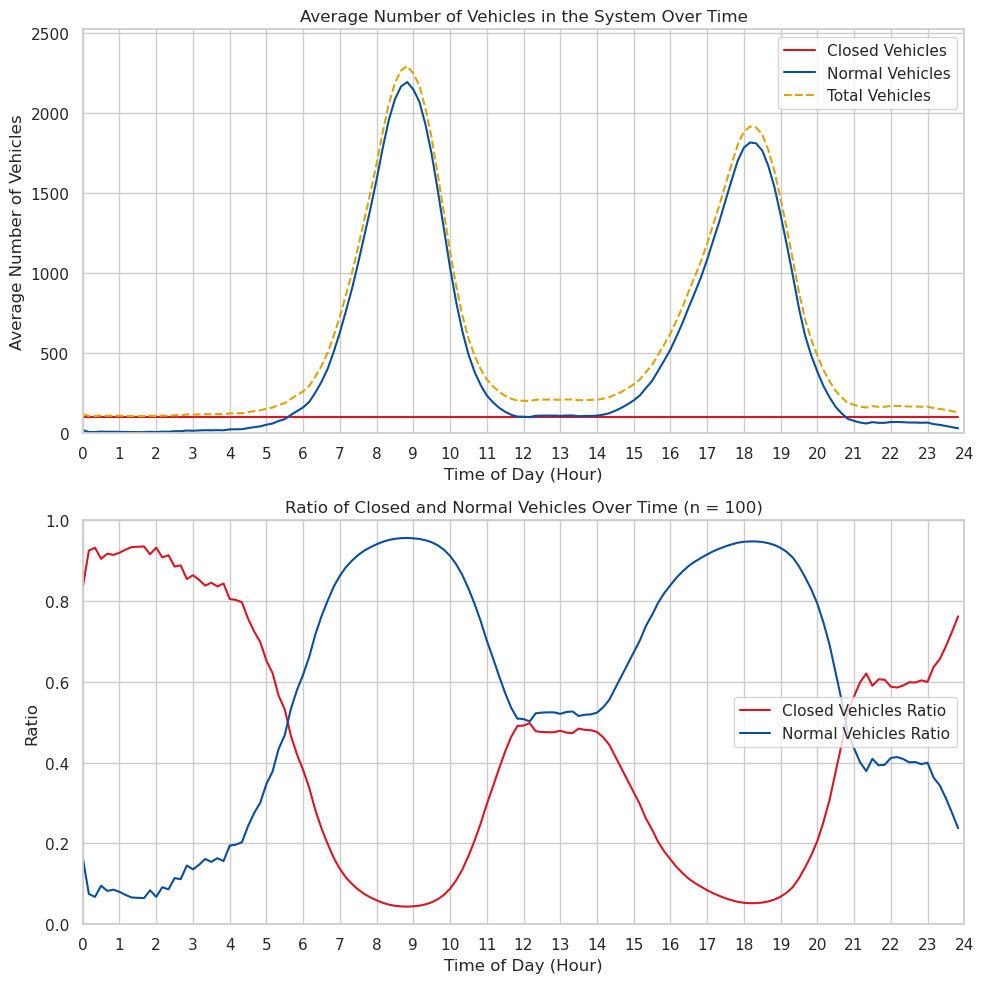

In [14]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

ax1.plot(time_points, closed_vehicle_counts, label='Closed Vehicles', color=MaximumRed)
ax1.plot(time_points, normal_vehicle_counts, label='Normal Vehicles', color=Prussian)
ax1.plot(time_points, total_vehicle_counts, label='Total Vehicles', linestyle='--', color='#DCA404')
ax1.set_xlabel('Time of Day (Hour)')
ax1.set_ylabel('Average Number of Vehicles')
ax1.set_title('Average Number of Vehicles in the System Over Time'.format(df['InDay'].nunique(), n))
ax1.set_xlim(0, 57600)
ax1.set_ylim(0, max(total_vehicle_counts) * 1.1)
hours = np.arange(0, 25, 1)
ax1.set_xticks(hours * 2400)
ax1.set_xticklabels(hours)
ax1.legend()

closed_ratio = closed_vehicle_counts / total_vehicle_counts
normal_ratio = normal_vehicle_counts / total_vehicle_counts
ax2.plot(time_points, closed_ratio, label='Closed Vehicles Ratio', color=MaximumRed)
ax2.plot(time_points, normal_ratio, label='Normal Vehicles Ratio', color=Prussian)
ax2.set_xlabel('Time of Day (Hour)')
ax2.set_ylabel('Ratio')
ax2.set_title('Ratio of Closed and Normal Vehicles Over Time (n = {})'.format(n))
ax2.set_xlim(0, 57600)
ax2.set_ylim(0, 1)
ax2.set_xticks(hours * 2400)
ax2.set_xticklabels(hours)
ax2.legend()

plt.tight_layout()
# plt.savefig('../pics/AverageNumberOfVehiclesInSystemOverTime_200.png')
plt.show()

In [15]:
lightIds = np.arange(0, 8000, 800)

def pass_light(originId, destinationId):
    if originId < destinationId:
        path = np.arange(originId, destinationId + 1)
    else:
        path = np.concatenate((np.arange(originId, 8000), np.arange(0, destinationId + 1)))
    
    return np.sum(np.isin(path, lightIds))

df['PassLightNum'] = df.apply(lambda x: pass_light(x['Origin'], x['Destination']), axis=1)

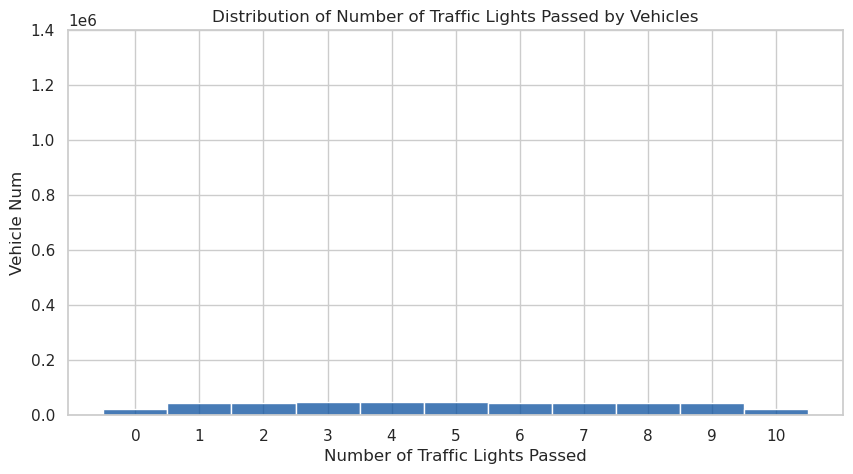

In [16]:
plt.figure(figsize=(10, 5))

# 获取最大值
max_value = df['PassLightNum'].max()

# 定义箱子边界，这里假定间隔为1
bins = range(max_value + 2)

# 绘制直方图
sns.histplot(df['PassLightNum'], bins=bins, kde=False, color=Prussian)

plt.xlabel('Number of Traffic Lights Passed')
plt.ylabel('Vehicle Num')
plt.title('Distribution of Number of Traffic Lights Passed by Vehicles')

# 计算每个柱子的中心位置：如果箱子从0到1，中心是0.5；从1到2中心是1.5，依此类推
centers = [x + 0.5 for x in range(max_value + 1)]

# 将X轴刻度设置在柱子的中间，并且标签为对应的整数
plt.xticks(centers, range(max_value + 1))
plt.ylim(0,1.4e6)

plt.show()

In [ ]:
pass_light_counts = [1,3,5]
in_days = [1,2,3]

# 找到StayTime的全局最大值，用于统一X轴范围
global_max_stay = df['StayTime'].max()
global_min_stay = df['StayTime'].min() if 'StayTime' in df.columns else 0
if pd.isna(global_min_stay):
    global_min_stay = 0  # 如果出现空值则从0开始
if pd.isna(global_max_stay):
    global_max_stay = 0  # 如果为空值则给个默认值

fig, axes = plt.subplots(len(pass_light_counts), len(in_days), figsize=(15, 9), sharex=True, sharey=False)

for i, pass_light_count in enumerate(pass_light_counts):
    for j, in_day in enumerate(in_days):
        ax = axes[i, j]
        subset = df[(df['PassLightNum'] == pass_light_count) & (df['InDay'] == in_day)]
        print("Day: {}, Pass Light Num: {}, Average Travel Time: {}".format(in_day, pass_light_count, subset['StayTime'].mean()))
        
        sns.histplot(subset['StayTime'], bins=20, kde=True, ax=ax, color='blue')
        
        ax.set_title(f'PassLightNum: {pass_light_count}, InDay: {in_day}')
        ax.set_xlabel('Travel Time')
        ax.set_ylabel('Vehicle Num')
        
plt.tight_layout()

# 每一行统一Y轴范围
for i in range(len(pass_light_counts)):
    max_ylim = 0
    for j in range(len(in_days)):
        current_ylim = axes[i, j].get_ylim()[1]
        if current_ylim > max_ylim:
            max_ylim = current_ylim
    for j in range(len(in_days)):
        axes[i, j].set_ylim(0, max_ylim)

# 统一所有子图的X轴范围为全局最大/最小值区间
for i in range(len(pass_light_counts)):
    for j in range(len(in_days)):
        axes[i, j].set_xlim(global_min_stay, global_max_stay)

plt.show()

In [ ]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

def fit_func(x, b, c):
    return b * x + c

pass_light_counts = [0, 1, 2, 3, 4, 5, 6, 7, 8]

fig, axes = plt.subplots(3, 3, figsize=(15, 15), sharex=True, sharey=True)

for i, pass_light_count in enumerate(pass_light_counts):
    ax = axes[i // 3, i % 3]
    subset = df[(df['PassLightNum'] == pass_light_count)]
    dayStayTime = subset.groupby('InDay')['StayTime'].mean()
    
    ax.plot(dayStayTime.index, dayStayTime, color='blue', label='Original Data')
    
    x_data = dayStayTime.index
    y_data = dayStayTime.values
    
    # 拟合第一个时间段 1-20天
    mask1 = (x_data >= 2) & (x_data <= 3)
    popt1, _ = curve_fit(fit_func, x_data[mask1], y_data[mask1])
    x_fit1 = np.linspace(2, 3, 100)
    y_fit1 = fit_func(x_fit1, *popt1)
    ax.plot(x_fit1, y_fit1, color='red', linestyle='--', label='Fit 1-20 days')
    
    # 拟合第二个时间段 21-35天
    mask2 = (x_data >= 4) & (x_data <= 5)
    popt2, _ = curve_fit(fit_func, x_data[mask2], y_data[mask2])
    x_fit2 = np.linspace(4, 5, 100)
    y_fit2 = fit_func(x_fit2, *popt2)
    ax.plot(x_fit2, y_fit2, color='green', linestyle='--', label='Fit 21-35 days')
    
    # 拟合第三个时间段 36-55天
    mask3 = (x_data >= 6) & (x_data <= 7)
    popt3, _ = curve_fit(fit_func, x_data[mask3], y_data[mask3])
    x_fit3 = np.linspace(6, 7, 100)
    y_fit3 = fit_func(x_fit3, *popt3)
    ax.plot(x_fit3, y_fit3, color='orange', linestyle='--', label='Fit 36-55 days')
    
    
    ax.set_title(f'PassLightNum: {pass_light_count}')
    ax.set_xlabel('Day')
    ax.set_ylabel('Average Stay Time')
    ax.set_ylim(0, dayStayTime.max()*1.1)
    ax.set_xlim(1, df['InDay'].max())
    ax.legend()

plt.tight_layout()
plt.show()
print(dayStayTime)

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15), sharex=True, sharey=True)

for i, pass_light_count in enumerate(pass_light_counts):
    ax = axes[i // 3, i % 3]
    subset = df[(df['PassLightNum'] == pass_light_count) & (df['ClosedVehicle'] == True)]
    dayStayTime = subset.groupby('InDay')['StayTime'].mean()
    
    ax.plot(dayStayTime.index, dayStayTime, color='blue', label='Original Data')
    
    x_data = dayStayTime.index
    y_data = dayStayTime.values
    
    mask1 = (x_data >= 1) & (x_data <= 21)
    popt1, _ = curve_fit(fit_func, x_data[mask1], y_data[mask1])
    x_fit1 = np.linspace(1, 21, 100)
    y_fit1 = fit_func(x_fit1, *popt1)
    ax.plot(x_fit1, y_fit1, color='red', linestyle='--', label='Fit 1-20 days')
    
    # 拟合第二个时间段 21-35天
    mask2 = (x_data >= 22) & (x_data <= 41)
    popt2, _ = curve_fit(fit_func, x_data[mask2], y_data[mask2])
    x_fit2 = np.linspace(22, 42, 100)
    y_fit2 = fit_func(x_fit2, *popt2)
    ax.plot(x_fit2, y_fit2, color='green', linestyle='--', label='Fit 21-35 days')
    
    # 拟合第三个时间段 36-55天
    mask3 = (x_data >= 42) & (x_data <= 61)
    popt3, _ = curve_fit(fit_func, x_data[mask3], y_data[mask3])
    x_fit3 = np.linspace(42, 61, 100)
    y_fit3 = fit_func(x_fit3, *popt3)
    ax.plot(x_fit3, y_fit3, color='orange', linestyle='--', label='Fit 36-55 days')
    
    
    ax.set_title(f'PassLightNum: {pass_light_count}')
    ax.set_xlabel('Day')
    ax.set_ylabel('Didi Average Stay Time')
    ax.set_ylim(0, 10000)
    ax.set_xlim(1, df['InDay'].max())
    ax.legend()

plt.tight_layout()
plt.show()
print(dayStayTime)

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15), sharex=True, sharey=True)

for i, pass_light_count in enumerate(pass_light_counts):
    ax = axes[i // 3, i % 3]
    subset = df[(df['PassLightNum'] == pass_light_count) & (df['ClosedVehicle'] == False)]
    dayStayTime = subset.groupby('InDay')['StayTime'].mean()
    
    ax.plot(dayStayTime.index, dayStayTime, color='blue', label='Original Data')
    
    x_data = dayStayTime.index
    y_data = dayStayTime.values
    
    # 拟合第一个时间段 1-20天
    mask1 = (x_data >= 1) & (x_data <= 21)
    popt1, _ = curve_fit(fit_func, x_data[mask1], y_data[mask1])
    x_fit1 = np.linspace(1, 21, 100)
    y_fit1 = fit_func(x_fit1, *popt1)
    ax.plot(x_fit1, y_fit1, color='red', linestyle='--', label='Fit 1-20 days')
    
    # 拟合第二个时间段 21-35天
    mask2 = (x_data >= 22) & (x_data <= 41)
    popt2, _ = curve_fit(fit_func, x_data[mask2], y_data[mask2])
    x_fit2 = np.linspace(22, 41, 100)
    y_fit2 = fit_func(x_fit2, *popt2)
    ax.plot(x_fit2, y_fit2, color='green', linestyle='--', label='Fit 21-35 days')
    
    # 拟合第三个时间段 36-55天
    mask3 = (x_data >= 42) & (x_data <= 61)
    popt3, _ = curve_fit(fit_func, x_data[mask3], y_data[mask3])
    x_fit3 = np.linspace(42, 61, 100)
    y_fit3 = fit_func(x_fit3, *popt3)
    ax.plot(x_fit3, y_fit3, color='orange', linestyle='--', label='Fit 36-55 days')
    
    
    ax.set_title(f'PassLightNum: {pass_light_count}')
    ax.set_xlabel('Day')
    ax.set_ylabel('Gaode Average Stay Time')
    ax.set_ylim(0, 10000)
    ax.set_xlim(1, df['InDay'].max())
    ax.legend()

plt.tight_layout()
plt.show()
print(dayStayTime)

In [ ]:

subset = df[(df['PassLightNum'] == 8) & (df['ClosedVehicle'] == True)]
dayStayTime = subset.groupby('InDay')['StayTime'].describe()
print(dayStayTime)

In [ ]:
subset = df[(df['PassLightNum'] == 8) & (df['ClosedVehicle'] == False)]
dayStayTime = subset.groupby('InDay')['StayTime'].describe()
print(dayStayTime)